In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
comps = pd.read_csv('meta_data/Competitions.csv')
tags = pd.read_csv('meta_data/CompetitionTags.csv')
teams = pd.read_csv('meta_data/Teams.csv',low_memory=False)
subs = pd.read_csv('meta_data/Submissions.csv')

In [5]:
comps[comps.Title=='SIIM-FISABIO-RSNA COVID-19 Detection'] #Kaggle comp we are looking at, used to verify stuff.

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
4001,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,08/09/2021 23:59:00,08/02/2021 23:59:00,...,True,1305,1786,32307,NaN,NaN,False,False,NaN,1


In [6]:
j_df = pd.merge(comps, tags, left_on='Id', right_on='CompetitionId', how='inner', validate='m:m') #m:m a comp can have many tags, and a tag can belong to many comps
comps.shape,j_df.shape #There are a considerable number of untagged competitions...

((5576, 42), (793, 45))

In [8]:
j_df[j_df.Title=='SIIM-FISABIO-RSNA COVID-19 Detection'] #Expect 2: image, multilabel classification
#There is a third tag online, but this seems to be a non-standard one, and doesn't appear.

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
595,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,08/09/2021 23:59:00,08/02/2021 23:59:00,...,32307,NaN,NaN,False,False,NaN,1,829,26680,14102
596,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,08/09/2021 23:59:00,08/02/2021 23:59:00,...,32307,NaN,NaN,False,False,NaN,1,830,26680,16636


In [6]:
j_df[j_df.Title=='RSNA 2022 Cervical Spine Fracture Detection'] #expect 3 tags: image, binary classification, computervision

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
720,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,...,12871,NaN,NaN,False,False,NaN,1,1023,36363,13207
721,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,...,12871,NaN,NaN,False,False,NaN,1,994,36363,14102
722,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,...,12871,NaN,NaN,False,False,NaN,1,995,36363,14201


In [7]:
j_df[j_df.Title=='Data Science Bowl 2017'] #image comp that is not a code comp. tags: image, binaryclassification, healthcare

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
186,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,96,6004,4202
187,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,94,6004,14102
188,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,97,6004,14201


So tag 14102 is for image competitions as it is present in all of these cases

In [17]:
image = j_df[j_df.TagId==14102].copy().reset_index(drop=True)
image.shape #108 image-tagged competitions

(108, 45)

In [18]:
image[image.OnlyAllowKernelSubmissions].DeadlineDate    ## Is a kernal only the same as a code competition?
                                                        ## The dates seem to match.

47     04/10/2019 01:09:00
49     06/10/2019 22:09:06
51     07/08/2019 23:59:00
54     02/18/2021 23:59:00
55     10/24/2019 23:59:00
60     09/07/2019 23:59:00
61     03/16/2020 23:59:00
64     12/17/2019 23:59:00
65     05/11/2020 23:59:00
67     07/22/2020 23:59:00
70     09/29/2020 23:59:00
71     08/17/2020 23:59:00
72     08/19/2020 01:59:00
73     11/25/2020 23:59:00
76     10/06/2020 23:59:00
77     10/26/2020 23:59:00
80     05/10/2021 23:59:00
81     05/11/2021 23:59:00
82     03/16/2021 23:59:00
83     05/10/2021 23:59:00
86     01/14/2022 23:59:00
88     05/26/2021 23:59:00
89     05/26/2021 23:59:00
90     08/09/2021 23:59:00
91     07/14/2022 23:59:00
92     10/15/2021 23:59:00
94     10/01/2021 23:59:00
95     10/01/2021 23:59:00
96     12/30/2021 23:59:00
97     02/14/2022 23:59:00
102    09/22/2022 23:59:00
103    06/02/2022 23:59:00
104    05/30/2022 23:59:00
105    10/27/2022 23:59:00
106    10/10/2022 23:59:00
107    10/05/2022 23:59:00
Name: DeadlineDate, dtype: o

In [19]:
image[image.OnlyAllowKernelSubmissions]

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
47,10686,petfinder-adoption-prediction,PetFinder.my Adoption Prediction,How cute is that doggy in the shelter?,Featured,106880,2170.0,12/27/2018 18:52:10,04/10/2019 01:09:00,03/21/2019 23:59:00,...,3136,NaN,NaN,False,False,NaN,1,455,10686,14102
49,13251,imet-2019-fgvc6,iMet Collection 2019 - FGVC6,Recognize artwork attributes from The Metropol...,Research,161849,2567.0,03/28/2019 15:05:58,06/10/2019 22:09:06,05/28/2019 23:59:00,...,767,NaN,NaN,False,False,NaN,1,495,13251,14102
51,13435,aerial-cactus-identification,Aerial Cactus Identification,Determine whether an image contains a columnar...,Playground,144645,4.0,03/08/2019 19:22:51,07/08/2019 23:59:00,NaN,...,6776,NaN,NaN,False,False,NaN,1,484,13435,14102
54,13836,cassava-leaf-disease-classification,Cassava Leaf Disease Classification,Identify the type of disease present on a Cass...,Research,1000771,3758.0,11/19/2020 21:12:46,02/18/2021 23:59:00,02/11/2021 23:59:00,...,81524,NaN,NaN,False,False,NaN,1,754,13836,14102
55,14241,severstal-steel-defect-detection,Severstal: Steel Defect Detection,Can you detect and classify defects in steel?,Featured,288048,2888.0,07/25/2019 21:10:14,10/24/2019 23:59:00,10/17/2019 23:59:00,...,51874,NaN,NaN,False,False,NaN,1,538,14241,14102
60,14774,aptos2019-blindness-detection,APTOS 2019 Blindness Detection,Detect diabetic retinopathy to stop blindness ...,Featured,260503,2931.0,06/28/2019 01:15:11,09/07/2019 23:59:00,08/29/2019 23:59:00,...,71433,NaN,NaN,False,False,NaN,1,528,14774,14102
61,14897,bengaliai-cv19,Bengali.AI Handwritten Grapheme Classification,Classify the components of handwritten Bengali,Research,463791,1645.0,12/19/2019 23:47:42,03/16/2020 23:59:00,03/09/2020 23:59:00,...,38927,NaN,NaN,False,False,NaN,1,586,14897,14102
64,16017,Kannada-MNIST,Kannada MNIST,MNIST like datatset for Kannada handwritten di...,Playground,362849,4.0,09/18/2019 13:41:34,12/17/2019 23:59:00,NaN,...,11077,NaN,NaN,False,False,NaN,1,550,16017,14102
65,18278,flower-classification-with-tpus,Flower Classification with TPUs,Use TPUs to classify 104 types of flowers,Playground,522291,3734.0,02/10/2020 20:16:21,05/11/2020 23:59:00,05/04/2020 23:59:00,...,10387,NaN,NaN,False,False,NaN,1,596,18278,14102
67,18647,prostate-cancer-grade-assessment,Prostate cANcer graDe Assessment (PANDA) Chall...,Prostate cancer diagnosis using the Gleason gr...,Featured,628635,3741.0,04/21/2020 16:38:33,07/22/2020 23:59:00,07/15/2020 23:59:00,...,19723,NaN,NaN,False,False,NaN,1,655,18647,14102


In [15]:
comps[comps.Title=='Quora Insincere Questions Classification']
#The first one here is the example comp linked to Code comps in their FAQ,
# which uses the term 'kernel' rather than notebook. It finished in early-2019, so 4 years ago.

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
1087,10737,quora-insincere-questions-classification,Quora Insincere Questions Classification,Detect toxic content to improve online convers...,Featured,82935,407.0,11/06/2018 17:59:32,02/13/2019 23:09:00,01/29/2019 23:59:00,...,True,1396,1726,2506,NaN,NaN,False,False,NaN,1
3239,22518,AI5112020-quora,Quora Insincere Questions Classification,IIITB ML 2020 Project - 3,Community,894712,NaN,09/18/2020 11:09:23,12/18/2020 23:59:00,NaN,...,False,2,2,14,NaN,NaN,False,False,NaN,1


In [20]:
comps[comps.Title=='PetFinder.my Adoption Prediction'] #The oldest 'Kernel only comp I found'

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
1080,10686,petfinder-adoption-prediction,PetFinder.my Adoption Prediction,How cute is that doggy in the shelter?,Featured,106880,2170.0,12/27/2018 18:52:10,04/10/2019 01:09:00,03/21/2019 23:59:00,...,True,1788,2329,3136,NaN,NaN,False,False,NaN,1


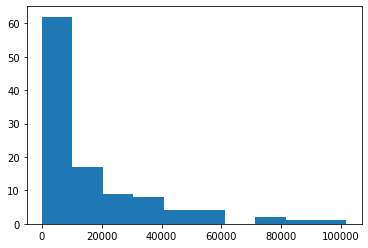

In [11]:
plt.hist(image.TotalSubmissions);

In [12]:
image = image[['CompetitionId', 'Title', 'HostSegmentTitle', 'OnlyAllowKernelSubmissions', 'RewardQuantity', 'TotalTeams',  'TotalSubmissions' ]]
image['subs_per_team'] = image.TotalSubmissions/image.TotalTeams

In [13]:
image.describe().to_csv('meta_data/meta/all_image_descriptives.csv')

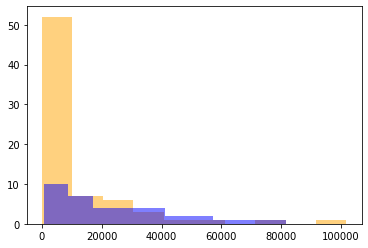

In [14]:
plt.hist(image[image.OnlyAllowKernelSubmissions==False].TotalSubmissions, alpha=0.5, bins=10, color='orange')
plt.hist(image[image.OnlyAllowKernelSubmissions].TotalSubmissions, alpha=0.5, bins=10, color='blue');
#Not sure this is meaningful actually.

In [15]:
image[image.OnlyAllowKernelSubmissions].TotalSubmissions.describe()

count       36.000000
mean     24894.416667
std      20839.013687
min        767.000000
25%       8584.500000
50%      18920.500000
75%      39087.250000
max      81524.000000
Name: TotalSubmissions, dtype: float64

In [16]:
image[image.OnlyAllowKernelSubmissions==False].TotalSubmissions.describe()

count        72.000000
mean      10915.847222
std       17952.918924
min          27.000000
25%         753.250000
50%        4374.000000
75%       11217.250000
max      101845.000000
Name: TotalSubmissions, dtype: float64

In [17]:
36/108 #33% code comps in total, but they have only existed since 2019

0.3333333333333333

In [18]:
image['subs_per_team'] = image.TotalSubmissions/image.TotalTeams

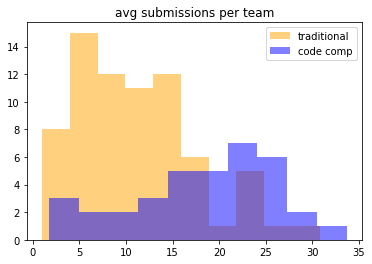

In [19]:
plt.hist(image[image.OnlyAllowKernelSubmissions==False].subs_per_team, alpha=0.5, bins=10, color='orange',label='traditional')
plt.hist(image[image.OnlyAllowKernelSubmissions].subs_per_team, alpha=0.5, bins=10, color='blue', label='code comp')
plt.title('avg submissions per team')
plt.legend();

In [20]:
ccomps = image[image.OnlyAllowKernelSubmissions].copy().reset_index(drop=True)
ccomps = ccomps[['CompetitionId', 'Title', 'HostSegmentTitle', 'RewardQuantity', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', ]]
ccomps.to_csv('meta_data/meta/image_code_comps.csv', index=False)

In [21]:
desc = ccomps.describe()
desc.to_csv('meta_data/meta/image_code_descriptives.csv')

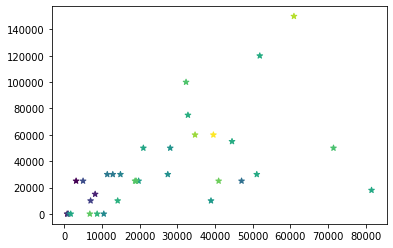

In [23]:
plt.scatter(ccomps.TotalSubmissions, ccomps.RewardQuantity, marker='*', c=ccomps.subs_per_team);

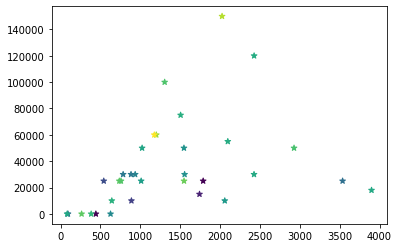

In [24]:
plt.scatter(ccomps.TotalTeams, ccomps.RewardQuantity, marker='*', c=ccomps.subs_per_team);

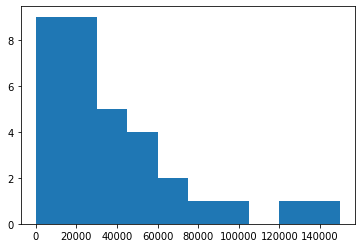

In [25]:
plt.hist(ccomps.RewardQuantity);

In [26]:
ccomps[['TotalSubmissions', 'TotalTeams', 'subs_per_team', 'RewardQuantity']].sort_values('subs_per_team', ascending=False)

,TotalSubmissions,TotalTeams,subs_per_team,RewardQuantity
30,39568,1175,33.674894,60000.0
29,60934,2025,30.090864,150000.0
16,34699,1200,28.915833,60000.0
24,40956,1548,26.457364,25000.0
26,6782,263,25.787072,0.0
10,18783,736,25.520380,25000.0
17,19058,757,25.175694,25000.0
23,32307,1305,24.756322,100000.0
5,71433,2928,24.396516,50000.0
27,8717,383,22.759791,0.0


In [27]:
ccomps.TotalSubmissions.describe() #wide range here

count       36.000000
mean     24894.416667
std      20839.013687
min        767.000000
25%       8584.500000
50%      18920.500000
75%      39087.250000
max      81524.000000
Name: TotalSubmissions, dtype: float64

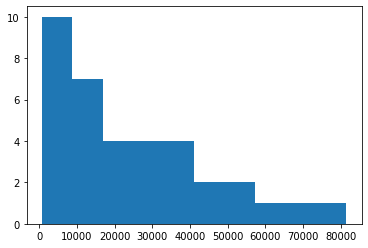

In [28]:
plt.hist(ccomps.TotalSubmissions);

In [29]:
ccomps.subs_per_team.describe() #mean lower than expected - do high scoring teams tend to submit more?

count    36.000000
mean     18.075550
std       7.912399
min       1.735294
25%      13.036124
50%      20.030006
75%      23.168972
max      33.674894
Name: subs_per_team, dtype: float64

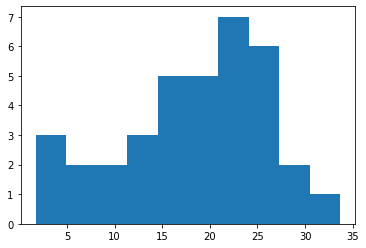

In [30]:
plt.hist(ccomps.subs_per_team);

In [31]:
ccomps.TotalTeams.describe()

count      36.000000
mean     1336.972222
std       896.393520
min        82.000000
25%       751.750000
50%      1187.500000
75%      1753.500000
max      3900.000000
Name: TotalTeams, dtype: float64

In [32]:
ccomps[['Title', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', 'RewardQuantity']][ccomps.TotalSubmissions==max(ccomps.TotalSubmissions)] #max total submissions

,Title,TotalTeams,TotalSubmissions,subs_per_team,RewardQuantity
3,Cassava Leaf Disease Classification,3900,81524,20.90359,18000.0


In [33]:
ccomps[['Title', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', 'RewardQuantity']][ccomps.TotalSubmissions==min(ccomps.TotalSubmissions)] #min total submissions

,Title,TotalTeams,TotalSubmissions,subs_per_team,RewardQuantity
1,iMet Collection 2019 - FGVC6,442,767,1.735294,0.0


In [34]:
ccomps[['Title', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', 'RewardQuantity']][ccomps.subs_per_team==max(ccomps.subs_per_team)] #max avg submissions per team

,Title,TotalTeams,TotalSubmissions,subs_per_team,RewardQuantity
30,HuBMAP + HPA - Hacking the Human Body,1175,39568,33.674894,60000.0


In [35]:
ccomps[['Title', 'TotalTeams', 'TotalSubmissions', 'subs_per_team', 'RewardQuantity']][ccomps.subs_per_team==min(ccomps.subs_per_team)] #min avg submissions per team

,Title,TotalTeams,TotalSubmissions,subs_per_team,RewardQuantity
1,iMet Collection 2019 - FGVC6,442,767,1.735294,0.0


In [36]:
ccomps[ccomps.CompetitionId==26680][['TotalTeams', 'TotalSubmissions']].head(1) #get values for the SIIM competition

,TotalTeams,TotalSubmissions
23,1305,32307


In [37]:
subs['SubmissionId'] = subs['Id'] #rename and reduce this table
subs = subs[['SubmissionId', 'TeamId', 'SourceKernelVersionId', 'SubmissionDate', 'IsAfterDeadline','PublicScoreLeaderboardDisplay','PrivateScoreLeaderboardDisplay']]


In [41]:
siimteams = teams[teams.CompetitionId==26680]

In [42]:
hope = pd.merge(siimteams, subs, left_on='Id', right_on='TeamId', validate='1:m')

In [46]:
#isolated all submissions belonging to the SIIM.... competition
finalSiim = hope[(hope.TeamLeaderId.isna()==False) & (hope.IsAfterDeadline==False) & (hope.LastSubmissionDate.isna()==False)].copy()
print(finalSiim.shape[0]) #32307 submissions, which bloody matches finally!! Woot!
print(len(finalSiim.TeamId.unique())) #1307 teams, which matches expected
finalSiim.to_csv('meta_data/meta/SIIM_only_submissions.csv', index=False)

32307
1305


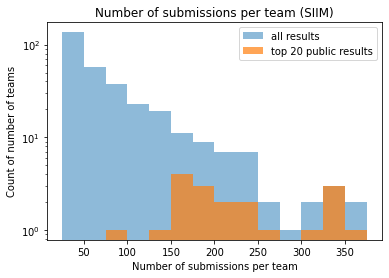

In [44]:
b = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]
n = 20

plt.hist(finalSiim.groupby(by='TeamId').count().Id, bins=b, log=True, alpha=0.5, label='all results')
plt.hist(finalSiim[finalSiim.PublicLeaderboardRank <=n].groupby('TeamId').count().Id, bins=b, log=True, alpha=0.7, label = f'top {n} public results')
plt.title('Number of submissions per team (SIIM)')
plt.xlabel('Number of submissions per team')
plt.ylabel('Count of number of teams')
plt.legend();

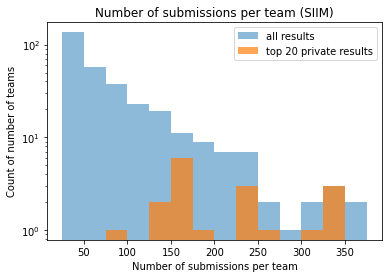

In [45]:
plt.hist(finalSiim.groupby(by='TeamId').count().Id, bins=b, log=True, alpha=0.5, label='all results')
plt.hist(finalSiim[finalSiim.PrivateLeaderboardRank <=n].groupby('TeamId').count().Id, bins=b, log=True, alpha=0.7, label = f'top {n} private results')
plt.title('Number of submissions per team (SIIM)')
plt.xlabel('Number of submissions per team')
plt.ylabel('Count of number of teams')
plt.legend();